In [1]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
shap_values_values = pd.read_csv("../02 Data/SHAP result/shap_values_values.csv")
shap_values_base_values = pd.read_csv("../02 Data/SHAP result/shap_values_base_values.csv")
shap_values_data = pd.read_csv("../02 Data/SHAP result/shap_values_data.csv")

In [3]:
shap_values_data.head()

,his_num_311_per_property,neighbor_his_num_per_property,snow_depth,percent_below_poverty,percent_civilian_unemployed,per_capita_income,percent_no_highschool,percent_65older,percent_17younger,percent_household_disability,...,percent_multiunit,percent_mobile_homes,percent_owneroccupiedunit,percent_crowding,percent_group_quarters,median_year_properties_built,median_value_properties_built,percent_no_vehicle,lon,lat
0,26.511628,30.289854,150.887612,0.147147,0.025063,24233,0.113924,0.225373,0.125373,0.496622,...,0.0,0.00000,0.804054,0.000000,0.007463,1926.0,84000,0.000000,1082646.130,1033332.952
1,22.717149,31.524310,144.951742,0.114962,0.121622,20756,0.053812,0.163990,0.387151,0.384793,...,0.0,0.00000,0.702765,0.069124,0.000000,1930.0,84000,0.225806,1082658.532,1035794.057
2,46.311475,32.054695,138.311245,0.128906,0.035519,21980,0.136915,0.180990,0.218750,0.221865,...,0.0,0.00000,0.540193,0.000000,0.000000,1910.0,63000,0.070740,1077492.312,1036704.665
3,42.962963,37.672279,141.764165,0.153184,0.194508,19691,0.190551,0.055938,0.453528,0.126649,...,0.0,0.00000,0.356201,0.042216,0.005164,1920.0,76000,0.155673,1082869.536,1041361.980
4,28.082192,35.043359,142.996062,0.271845,0.108824,22876,0.019157,0.208738,0.032362,0.301948,...,0.0,0.02965,0.314935,0.000000,0.000000,1910.0,77000,0.324675,1082899.546,1038932.074


In [5]:
final_columns = ['historical 311 requests pp', 'nearby-CBG historical 311 requests pp', 'snow depth', 
                 '% poverty', '% unemployed',
                 'income', '% < highschool', '% age ≥ 65', 
                 '% age < 18', '% disability', 
                 '% single parent', '% minority', 
                 '% not well English', '% single-unit structure',
                '% multi-unit structure', '% mobile homes',
                '% owner-occupied housing units', '% crowding housing units',
                '% in group quarters', 'median year built', 'median property value', '% no vehicle available', 'longitude', 'latitude']

In [6]:
combined_explanation = shap.Explanation(values=shap_values_values.to_numpy(), data=shap_values_data.to_numpy(), base_values=shap_values_base_values.to_numpy(), feature_names=final_columns)

Text(0, 0.5, 'Feature value')

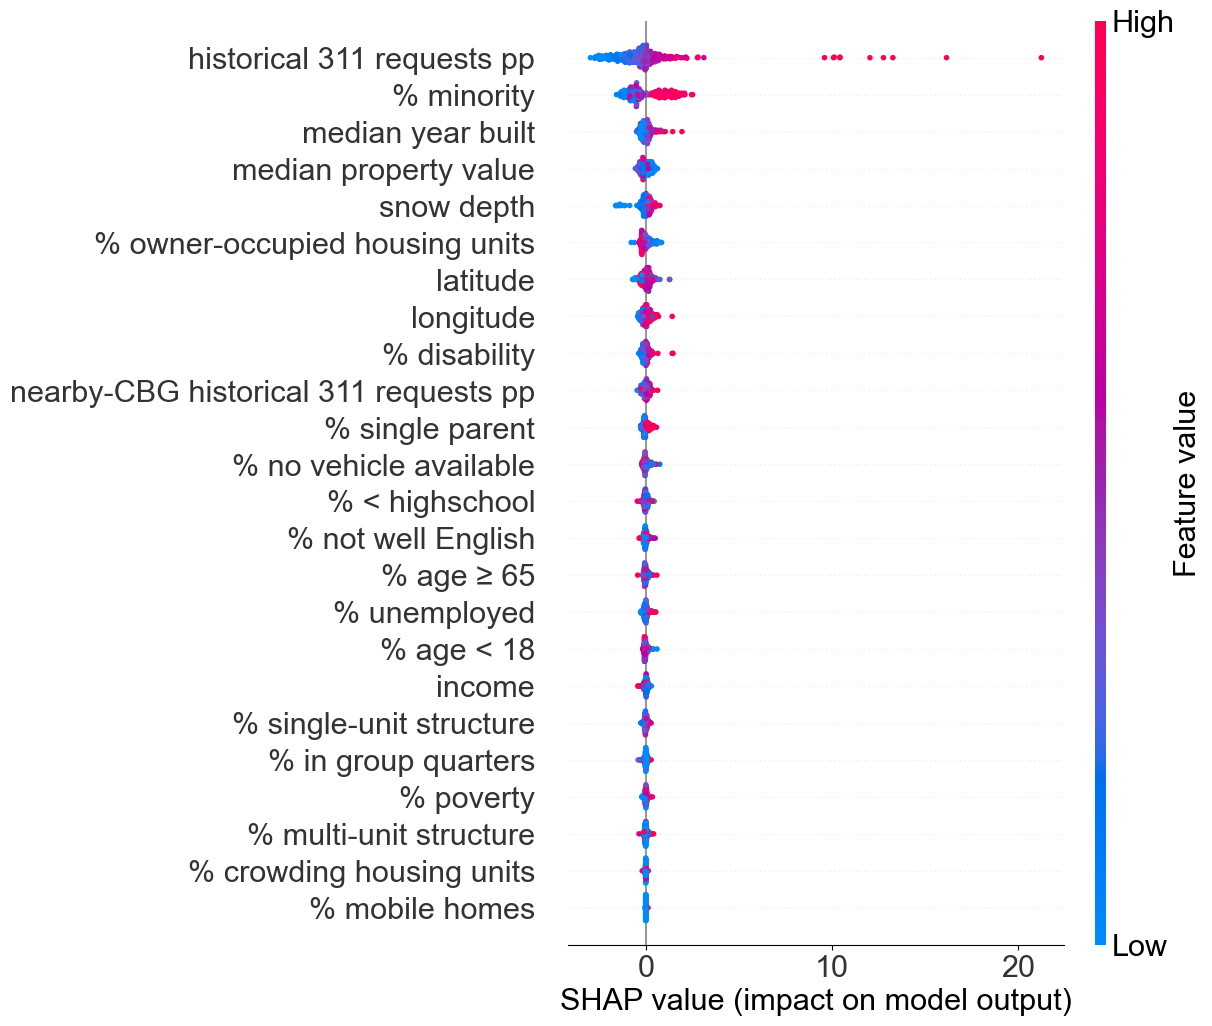

In [7]:
shap.plots.beeswarm(combined_explanation, max_display=24, show=False)

fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(8, 12)

ax.tick_params(labelsize=22, labelfontfamily="Arial", color="black")
ax.set_xlabel("SHAP value (impact on model output)", fontsize=22, fontfamily="Arial")

cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=22, labelfontfamily="Arial", color="black")
cb_ax.set_ylabel("Feature value", fontsize=22, fontfamily="Arial")

#plt.show()
# plt.savefig('../03 Figures/beeswarm_plot.png', format='png', dpi=300, bbox_inches='tight')

Text(0.5, 0, 'mean(|SHAP value|)')

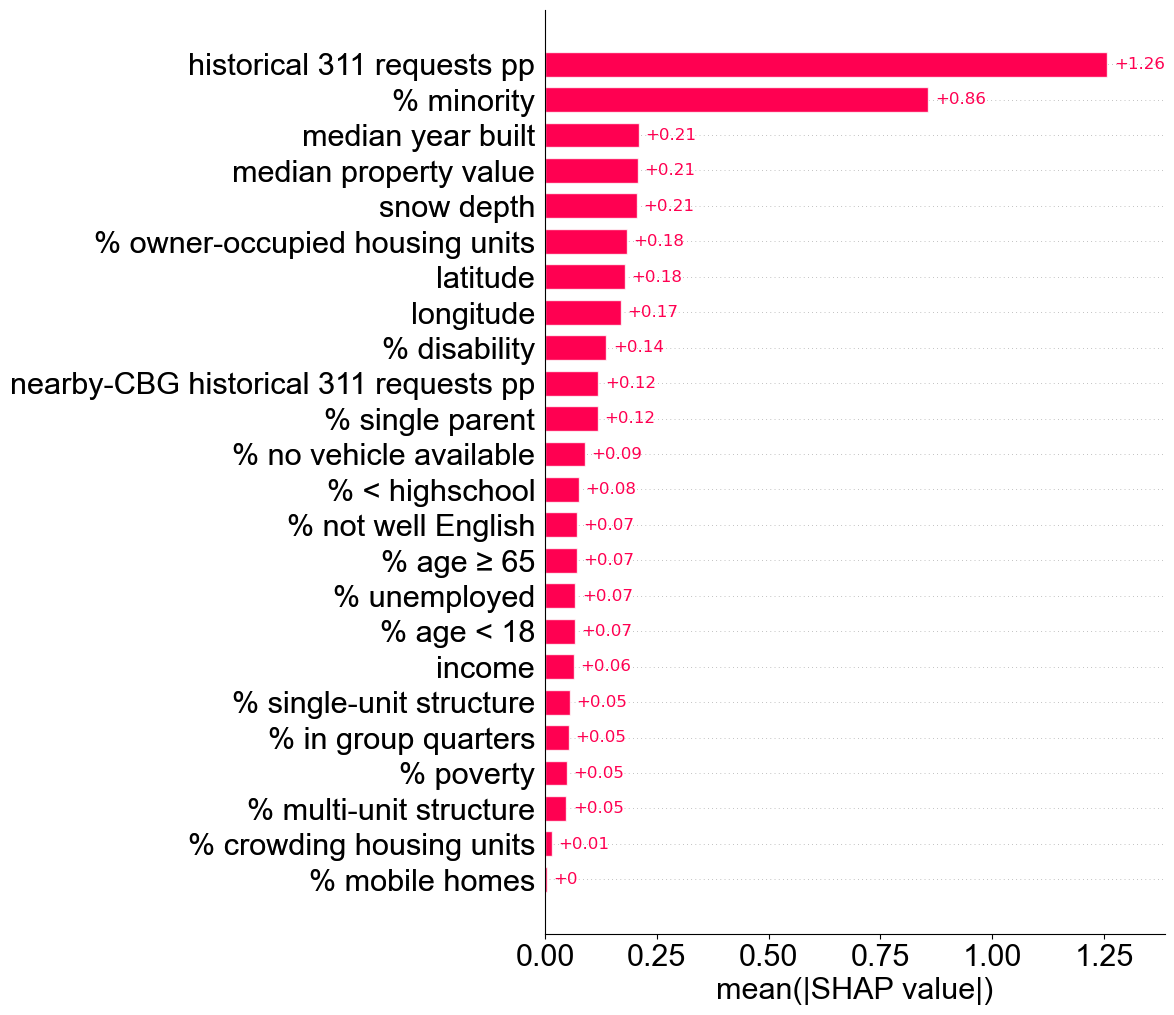

In [8]:
shap.plots.bar(combined_explanation, max_display=24, show=False)
fig, ax = plt.gcf(), plt.gca()
fig.set_size_inches(8, 12)

ax.tick_params(labelsize=22, labelfontfamily="Arial", color="black")
ax.set_xlabel("mean(|SHAP value|)", fontsize=22, fontfamily="Arial")

#plt.show()
# plt.savefig('../03 Figures/bar_plot.png', format='png', dpi=300, bbox_inches='tight')